In [1]:
import noodler as nl
from lcapy import s, V, f, Circuit
import numpy as np
import matplotlib.pyplot as plt

Suggest a constraint between nodes (6, 8) and (9, 7) for vertical graph


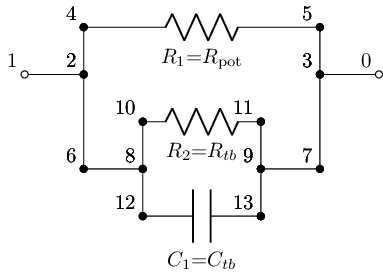

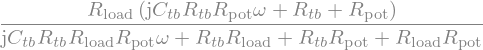

In [2]:
t = nl.toan.Toans()
t.draw()
t._get_tf()

In [8]:
p = nl.toan.Pot(500e3)
tb = nl.toan.ToanBleeder(220e3,0.0015e-6)

put method to detect if Voltage source already exists, or have one with one without or something?


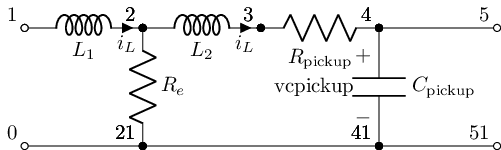

put method to detect if Voltage source already exists, or have one with one without or something?


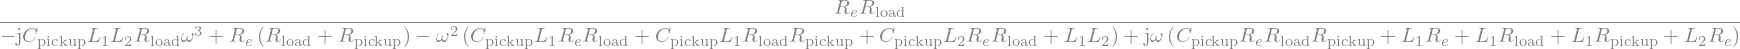

In [2]:
p = nl.pickup_electrical.Pickup_Electrical()
p.draw()
p._get_tf()

In [3]:
p.R_eddy

In [14]:
p.circuit_model.subs({"Re":p.R_eddy})

L1 1 2 L1; right, i={i_L}
Re 2 21 200000; down
W 0 21; right
L2 2 3 L2; right, i={i_L}
Rpickup 3 4 Rpickup; right
Cpickup 4 41 Cpickup; down, v=vcpickup
W 21 41; right
W 4 5; right
W 41 51; right

In [5]:
ss = p.substitute()

In [8]:
ss.s_model()

ZL1 1 2 5*s/2; right, i={i_L}
ZRe 2 21 200000; down
W 0 21; right
ZL2 2 3 5*s/2; right, i={i_L}
ZRpickup 3 4 15000; right
ZCpickup 4 41 {25000000000/(3*s)}; down, v=vcpickup
W 21 41; right
W 4 5; right
W 41 51; right

In [7]:
vf = np.logspace(0, 5, 400)
Z = p.H(f)


In [12]:
p.R_eddy
p.Rp
p.L

In [21]:
p.circuit_model.sub

L1 1 2;right, i={i_L}
Re 2 21;down
W 0 21;right
L2 2 3;right, i={i_L}
Rpickup 3 4;right
Cpickup 4 41;down,v=vcpickup
W 21 41;right
W 4 5;right
W 41 51;right

In [17]:
ev = Z.subs('Re',p.R_eddy).subs("Rpickup",p.Rp).subs("L1",p.L).subs("L2",p.L).subs("Cpickup",p.Cp).subs("Rload",10e3).evaluate(vf)

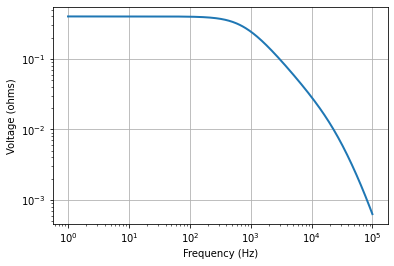

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(vf, abs(ev), linewidth=2)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Voltage (ohms)')
ax.grid(True)

In [19]:
pp = p.tf.poles()

In [1]:
p.H.

SyntaxError: invalid syntax (<ipython-input-1-6ed50ebf28ab>, line 1)

In [12]:
p.circuit_model.describe()

There are no non-zero independent sources so everything is zero.


In [11]:
rc = Circuit(tb.circuit.netlist())

In [14]:
rc.add("V 1 0 step;down")

W 1 2; right=0.5
W 2 4; up=0.4
W 3 5; up=0.4
R1 4 5 220000.0; right
W 2 6; down=0.4
W 3 7; down=0.4
C1 6 7 1.5e-09; right
W 3 0; right=0.5
V 1 0 step;down

In [18]:
rc.add("W 0 00; down")

W 1 2; right=0.5
W 2 4; up=0.4
W 3 5; up=0.4
R1 4 5 220000.0; right
W 2 6; down=0.4
W 3 7; down=0.4
C1 6 7 1.5e-09; right
W 3 0; right=0.5
W 0 00; down

In [19]:
rc.add("W 00 01; left")

W 1 2; right=0.5
W 2 4; up=0.4
W 3 5; up=0.4
R1 4 5 220000.0; right
W 2 6; down=0.4
W 3 7; down=0.4
C1 6 7 1.5e-09; right
W 3 0; right=0.5
W 0 00; down
W 00 01; left

In [20]:
rc.add("V 1 01 step; down")

W 1 2; right=0.5
W 2 4; up=0.4
W 3 5; up=0.4
R1 4 5 220000.0; right
W 2 6; down=0.4
W 3 7; down=0.4
C1 6 7 1.5e-09; right
W 3 0; right=0.5
W 0 00; down
W 00 01; left
V 1 01 step; down

In [58]:
rc["R1"].V

V
─
s

In [30]:
rc.annotate_voltage("R1")

W 1 2; right=0.5
W 2 4; up=0.4
W 3 5; up=0.4
R1 4 5 220000.0; right, v=$\frac{V}{s}$
W 2 6; down=0.4
W 3 7; down=0.4
C1 6 7 1.5e-09; right
W 3 0; right=0.5
W 0 00; down
W 00 01; left
V 1 01 step; down

In [56]:
for e in rc.elements:
    print(e)

WWanon1
WWanon2
WWanon3
R1
WWanon4
WWanon5
C1
WWanon6
WWanon7
WWanon8
V


In [8]:
poles = p.tf.poles()

In [12]:
zpk = p.tf.ZPK()

In [ ]:
zpk

<AxesSubplot:xlabel='Angular Frequency (rad/s)', ylabel='Transfer function magnitude'>

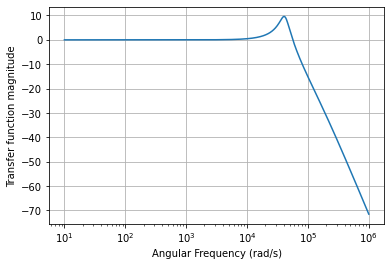

In [5]:
# p.get_tf()
p.plot_tf_their_way()

In [26]:
def _set_frequency_spacing(min_freq, max_freq, samples_per_decade = 5, log_base=10):
    ndecades = np.log10(max_freq) - np.log10(min_freq)
    npoints = int(ndecades) * samples_per_decade
 
    return np.logspace(np.log10(min_freq), np.log10(max_freq), num=npoints)

In [27]:
_set_frequency_spacing(20, 30000)

array([2.00000000e+01, 3.37204729e+01, 5.68535147e+01, 9.58563703e+01,
       1.61616107e+02, 2.72488578e+02, 4.59422186e+02, 7.74596669e+02,
       1.30598830e+03, 2.20192716e+03, 3.71250126e+03, 6.25936491e+03,
       1.05534372e+04, 1.77933447e+04, 3.00000000e+04])

In [7]:
1e5 * (np.pi/180)

In [9]:
p.circuit_model.add("Vi 1 0 step; down")

L1 1 2;right, i={i_L}
Re 2 2_1;down
W 0 2_1;right
L2 2 3;right, i={i_L}
Rpickup 3 4;right
Cpickup 4 41;down,v=vcpickup
W 2_1 41;right
W 4 5;right
W 41 51;right
Vi 1 0 step; down

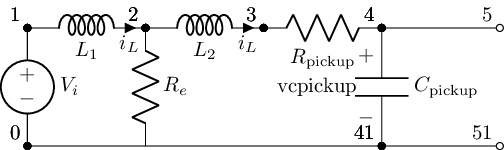

In [10]:
p.circuit_model.draw()

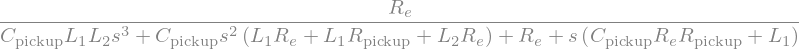

In [11]:
(p.circuit_model.Cpickup.V(s) / p.circuit_model.Vi.V(s)).simplify()

In [8]:
p.circuit_model.twoport(1,0,5,51)

AttributeError: 'TwoPortBModel' object has no attribute 'args'

AttributeError: 'TwoPortBModel' object has no attribute 'args'

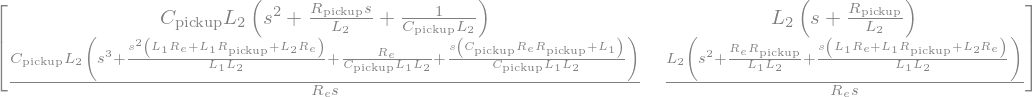

In [63]:
p.circuit_model.Aparams(2,"2_1",N2p,N2m)

In [6]:
N2p = 4
N2m = 41
p.circuit_model.Voc(N2p,N2m)
p.circuit_model.Isc(N2p,N2m)

                       -Rₑ⋅V₄₂                       
                      -────────                      
                        L₁⋅L₂                        
─────────────────────────────────────────────────────
                      2                              
 3   Rₑ⋅R_pickup⋅s   s ⋅(L₁⋅Rₑ + L₁⋅R_pickup + L₂⋅Rₑ)
s  + ───────────── + ────────────────────────────────
         L₁⋅L₂                    L₁⋅L₂              

In [38]:
v=Circuit(vol.netlist())

Suggest a constraint between nodes (8, 10) and (11, 9) for vertical graph


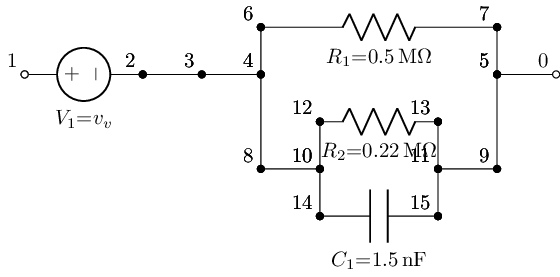

In [46]:
v.draw()

In [43]:
import lcapy

In [26]:
vol.Z(f).evaluate(audible_frequencies)

array([152777.46102391  -219.98375171j, 152777.4278743   -231.20846279j,
       152777.39125545  -243.00591128j, 152777.3508043   -255.40532005j,
       152777.30611977  -268.43740285j, 152777.25675885  -282.13444039j,
       152777.20223213  -296.53036021j, 152777.14199898  -311.66082071j,
       152777.07546223  -327.56329938j, 152777.00196218  -344.27718558j,
       152776.92077011  -361.84387803j, 152776.83108103  -380.3068872j ,
       152776.73200572  -399.71194304j, 152776.62256189  -420.10710809j,
       152776.50166445  -441.54289635j, 152776.36811479  -464.07239825j,
       152776.22058885  -487.75141191j, 152776.05762399  -512.63858112j,
       152775.87760454  -538.79554032j, 152775.67874575  -566.28706687j,
       152775.45907612  -595.18124116j, 152775.21641783  -625.54961477j,
       152774.94836517  -657.46738712j, 152774.65226071  -691.01359117j,
       152774.32516895  -726.2712884j , 152773.96384721  -763.32777374j,
       152773.56471355  -802.27479078j, 152773.1238

In [18]:
audible_frequencies = np.logspace(0, np.log10(20000), 200)

# c= R(2e3) | C(3e-6)

In [17]:
c

R(2000.0) | C(3e-06)

In [1]:
from lcapy import Circuit, j, omega, s, R, C, L, V, LSection, Series, Shunt

In [2]:
RC = LSection(R('R1'),C("C1"))

In [3]:
RC2 = Series(R("R2")).chain(Shunt(C('C2')))

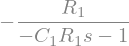

In [4]:
RC.Z2sc

In [5]:
RC2

Chain(Series(R(R2)), Shunt(C(C2)))

In [6]:
lr = (V('V') + L("L1") | R("R1") )+ (L("L2") + R("Rp")) | C("Cp")

In [7]:
c = Circuit()

In [69]:
c.add?

Signature: c.add(string)
Docstring:
Add a component to the netlist.
The general form is: 'Name Np Nm args'
where Np is the positive node and Nm is the negative node.

A positive current is defined to flow from the positive node
to the negative node.
File:      ~/opt/miniconda3/envs/jupyterlab/lib/python3.9/site-packages/lcapy/netfile.py
Type:      method


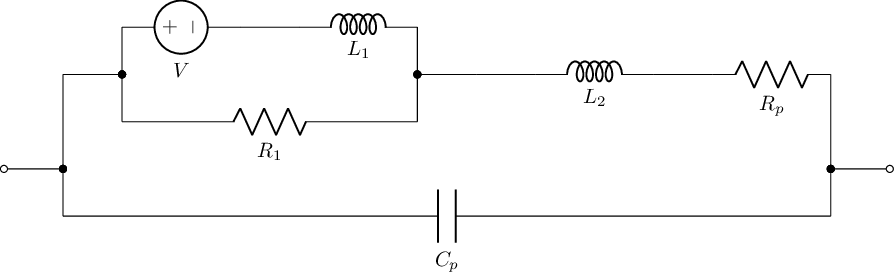

In [43]:
lr.draw()

In [19]:
pi = pickup.oneport('Cpickup').simplify()

In [10]:
tfpickup=(pickup.Cpickup.V(s) / pickup.V42.V(s))

In [ ]:
tfpickup

In [15]:
z = tfpickup.ZPK()

<AxesSubplot:xlabel='Re(s)', ylabel='Im(s)'>

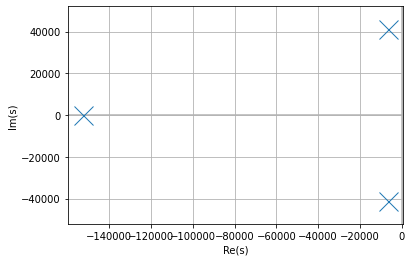

In [18]:
z.pole_zero_plot()

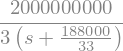

In [24]:
toan.impedance("R_vol")

In [22]:
toan.transfer("R_vol","R_toan_bleed")